In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


no data directory set up for clouds defaulting to /data
updated file list


In [3]:
import glob

In [4]:
!ls /artemis/readout/pkl/2016-01-1*.pkl

/artemis/readout/pkl/2016-01-13_235307_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_001100_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_004037_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_005301_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_112055_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_113602_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_115327_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_120831_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_121945_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_123211_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_124828_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_131752_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_133417_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_134911_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_144147_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-14_152512_sweep_and_stream.pkl
/artemis/readout/pkl/2016-01-15_125716_s

In [5]:
fns = glob.glob('/artemis/readout/pkl/2016-01-1[34]*.pkl')
fns.sort()

In [6]:
df = kid_readout.analysis.archive.build_simple_archive(fns)

In [7]:
df.shape

(1792, 92)

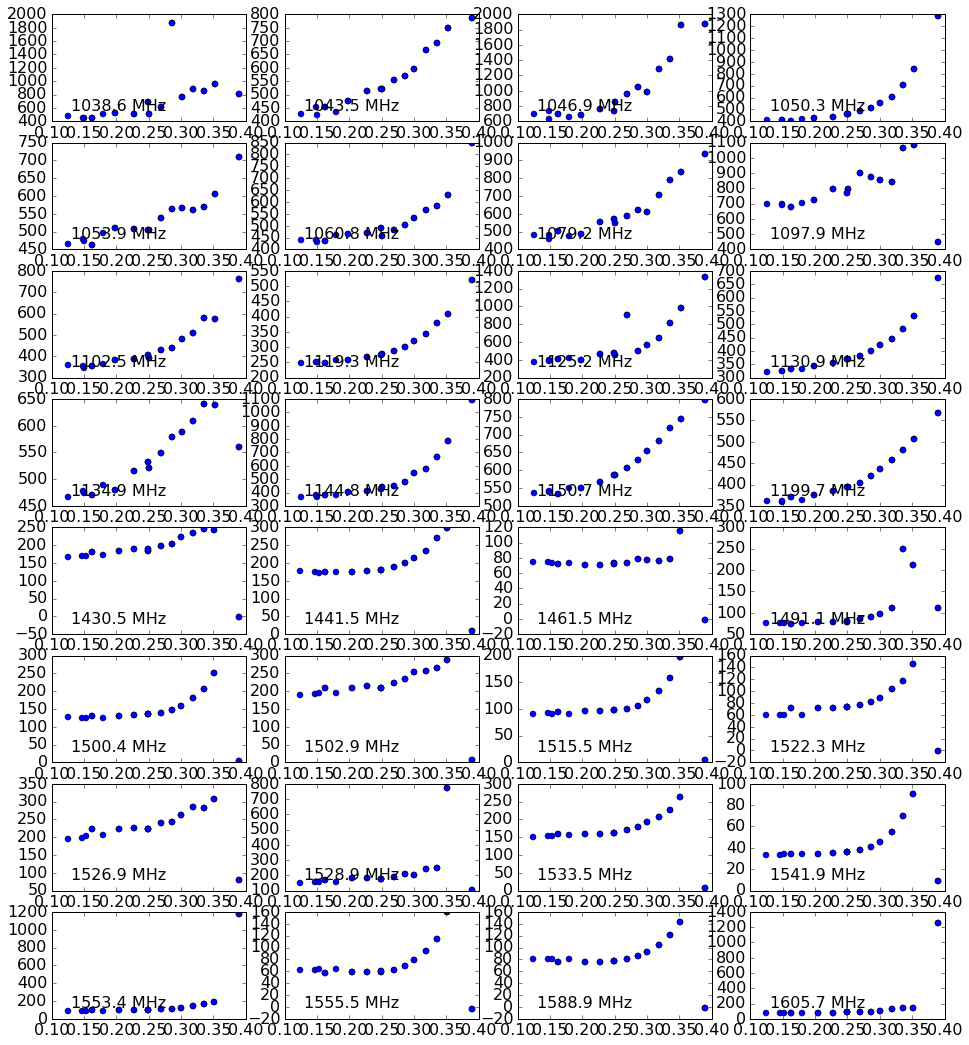

In [8]:
fig,axs = subplots(8,4,figsize=(16,18))
for k in range(32):
    ax = axs.flatten()[k]
    if k <16:
        dd = df[(df.resonator_id==k) & (df.atten==14) & (df.noise_measurement_freq_MHz<1300)]
    else:
        dd = df[(df.resonator_id==k-16) & (df.atten==14) & (df.noise_measurement_freq_MHz>1300)]
    ax.plot(dd.sweep_primary_package_temperature,1e6/dd.Q_i,'o')
    ax.text(0.1,0.1,('%.1f MHz' % dd.f_0.iloc[0]),transform=ax.transAxes)

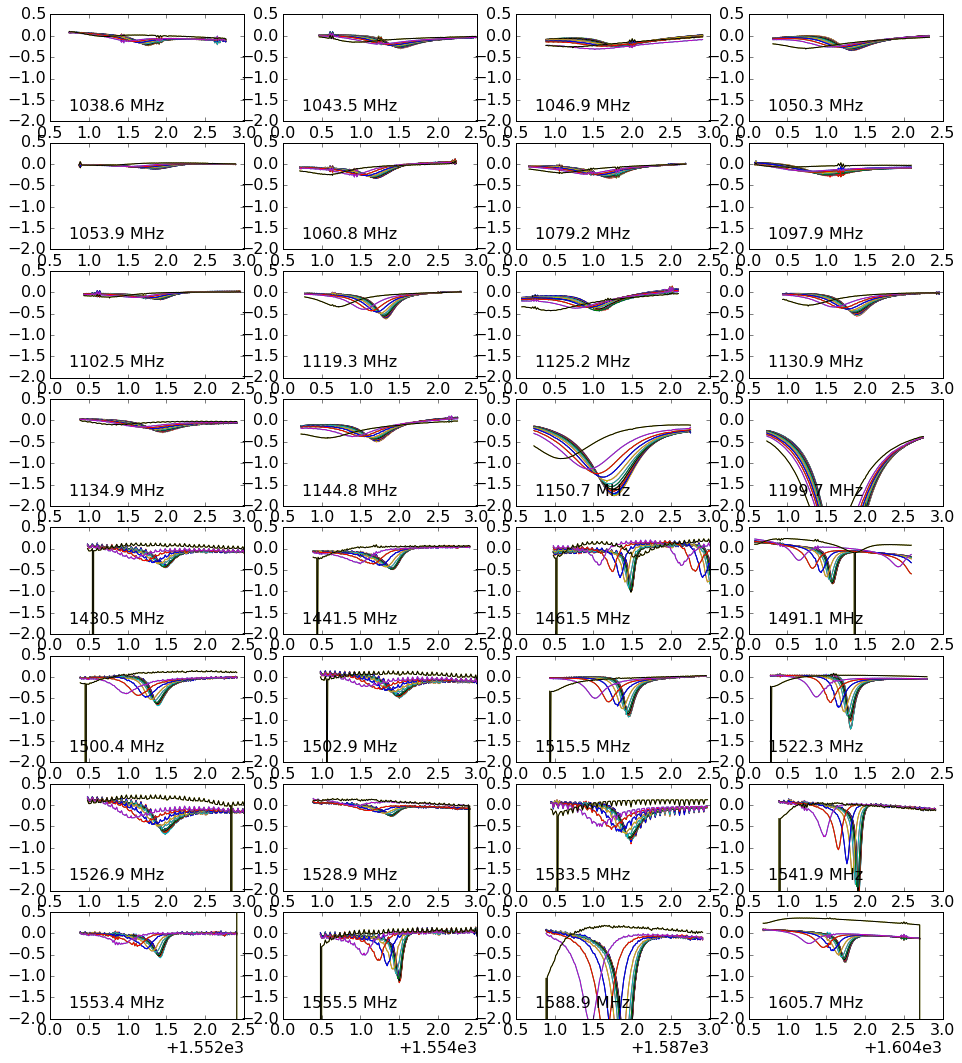

In [9]:
fig,axs = subplots(8,4,figsize=(16,18))
for k in range(32):
    ax = axs.flatten()[k]
    if k <16:
        dd = df[(df.resonator_id==k) & (df.atten==14) & (df.noise_measurement_freq_MHz<1300)]
    else:
        dd = df[(df.resonator_id==k-16) & (df.atten==14) & (df.noise_measurement_freq_MHz>1300)]
    for m,row in dd.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21/row.A_mag)))
    ax.text(0.1,0.1,('%.1f MHz' % dd.f_0.iloc[0]),transform=ax.transAxes)
    ax.set_ylim(-2,.5)

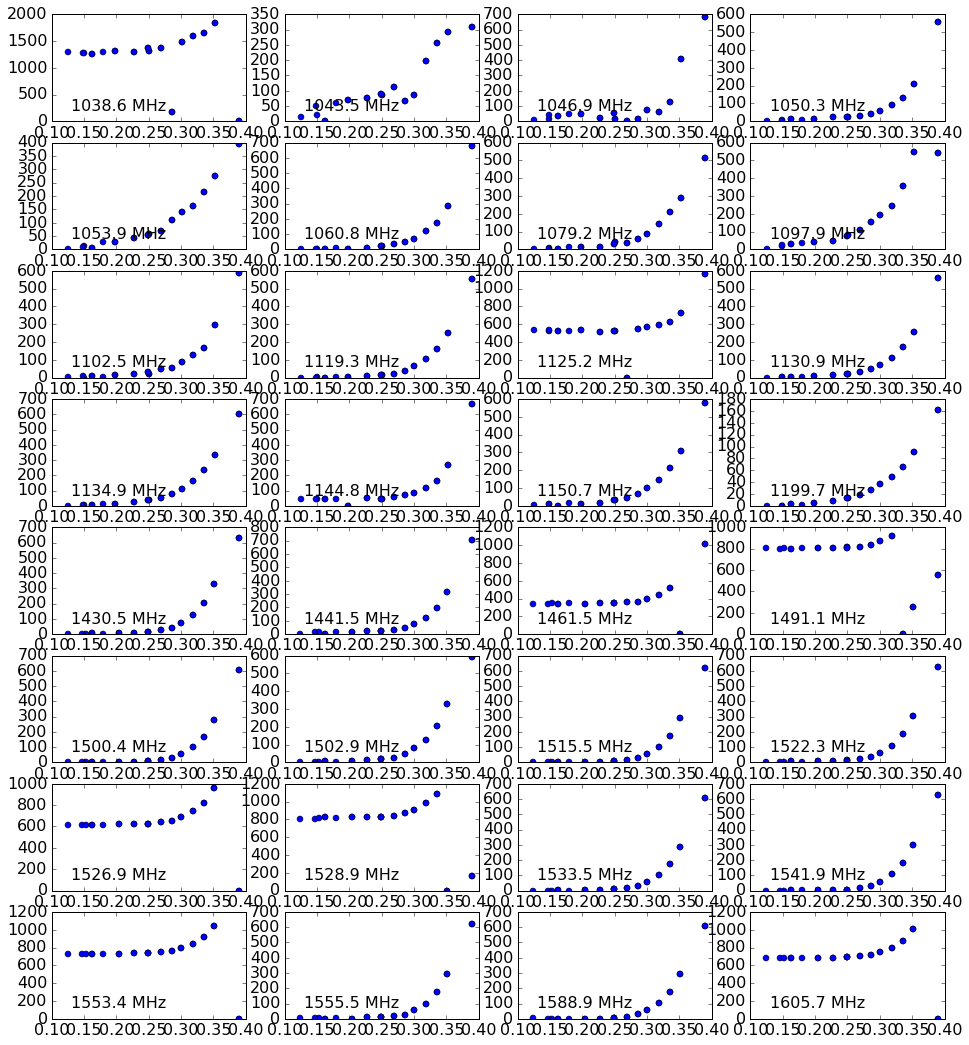

In [10]:
fig,axs = subplots(8,4,figsize=(16,18))
for k in range(32):
    ax = axs.flatten()[k]
    if k <16:
        dd = df[(df.resonator_id==k) & (df.atten==14) & (df.noise_measurement_freq_MHz<1300)]
    else:
        dd = df[(df.resonator_id==k-16) & (df.atten==14) & (df.noise_measurement_freq_MHz>1300)]
    ax.plot(dd.sweep_primary_package_temperature,1e6*(1-dd.f_0/dd.f_0.max()),'o')
    ax.text(0.1,0.1,('%.1f MHz' % dd.f_0.iloc[0]),transform=ax.transAxes)

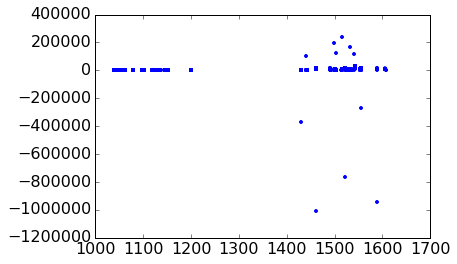

In [11]:
plot(df.f_0,df.Q_i,'.')
#ylim(0,3000)

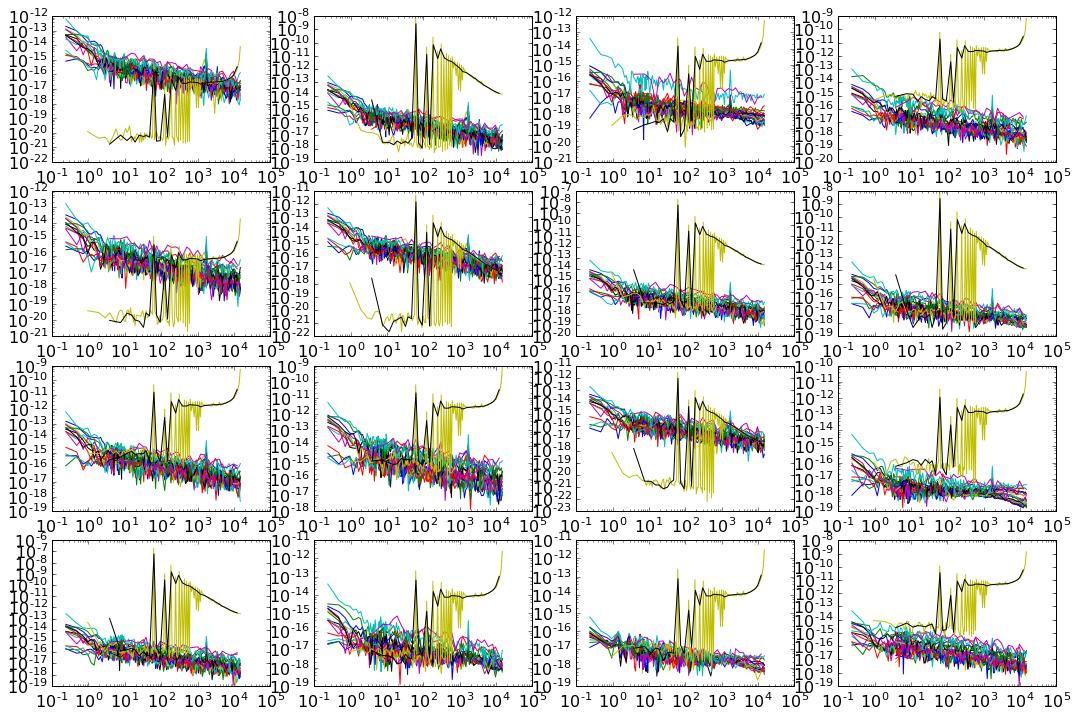

In [12]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.atten==14) & (df.noise_measurement_freq_MHz>1300)]
    for m,row in dd.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:])

In [13]:
pkls = kid_readout.analysis.archive.load_noise_pkl(fns[0])

In [14]:
pkl = pkls[0]

In [15]:
len(pkl.fit_params)

9

In [16]:
type([]) is list

True

In [17]:
type({}) is dict

True